<font color='blue'> Привет. Извини за долгую проверку. Ниже мои комментарии выделены синим. </font>

# Аналитика в авиакомпании

**Описание проекта**

Компания «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. 

Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.

Необходимо изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

### Аналитика средствами Python

В `/datasets/query_1.csv` содержится информация о:
  - **model** — модели самолета
  - **flights_amount** — количество рейсов для каждой модели самолетов model в сентябре 2018 года

В `/datasets/query_3.csv` содержится информация о:
   - **city** — городах
   - **average_flights** — среднем количестве рейсов, прибывающих в город `city` за день в сентябре 2018 года

Для этих двух наборов данных нужно:

   - [импортировать файлы;](#1)
   - [изучить данные в них;](#2)
   - [проверить типы данных на корректность;](#3)
   - [выбрать топ-10 городов по количеству рейсов;](#4)
   - [построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;](#5)
   - [сделать выводы по каждому из графиков, пояснить результат.](#6)
   
   
 <font color='blue'> Отличное, подробное описание проекта. Это очень полезно. </font>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import requests
import numpy as np
from bs4 import BeautifulSoup

 <a name="1"> Импортируем файлы:</a>

In [2]:
model = pd.read_csv('/datasets/query_1.csv')
city_flights = pd.read_csv('/datasets/query_3.csv')

 <a name="2"> Изучим данные в них: </a>

In [3]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
model.head(10)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [5]:
city_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [6]:
city_flights.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


 <a name="3"> Пропусков нет, типы данных в порядке. </a>
 
 <font color='blue'>Ок, да данные достаточно чистые, можно переходить к анализу. </font>

 <a name="4"> Выберем топ-10 городов по количеству прибывающих рейсов: </a>

In [7]:
top10 = city_flights.sort_values(by='average_flights', ascending = False).head(10)
top10cities = top10['city'].to_frame()
top10

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


 <a name="5"> Построим графики:  </a>
    - модели самолетов и количество рейсов 
    - города и количество рейсов 
    - топ-10 городов и количество рейсов

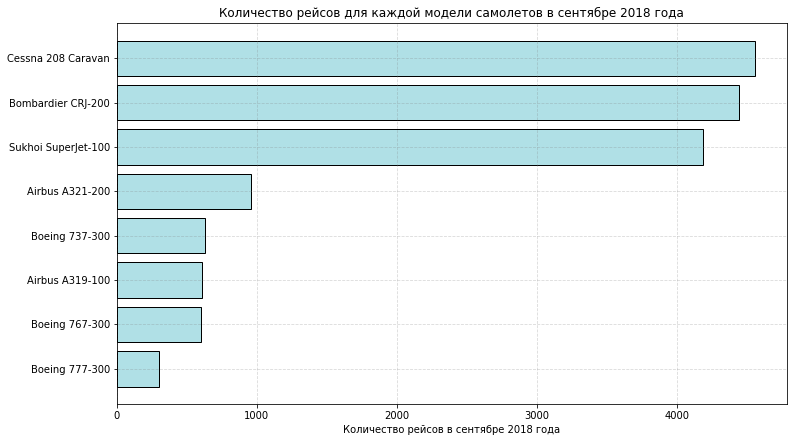

In [8]:
model_flights = model.sort_values(by='flights_amount', ascending = True)
plt.figure(figsize=(12, 7))
plt.barh(model_flights['model'], model_flights['flights_amount'], 
         ec='black', alpha = 1, color='powderblue')
plt.grid(True, linestyle='--', 
                   color='grey', alpha=.3)
plt.title('Количество рейсов для каждой модели самолетов в сентябре 2018 года')
plt.xlabel('Количество рейсов в сентябре 2018 года')
plt.show()

<font color='blue'> Хорошо, горизонтальный график отлично подходит в данном случае, все наглядно. </font>

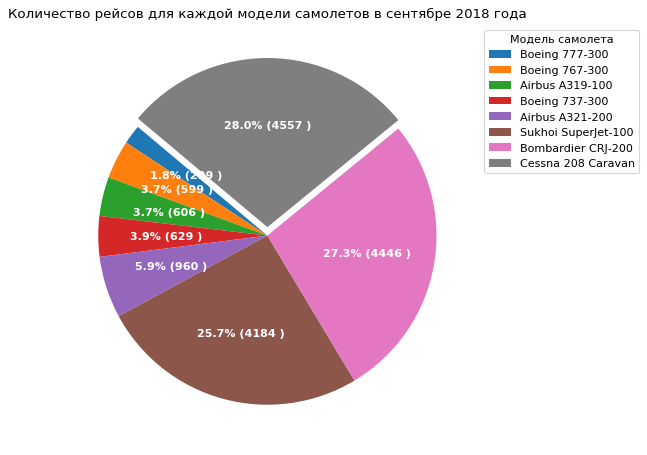

In [71]:
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = model_flights['flights_amount']
categories = model_flights['model']
explode = [0,0,0,0,0,0.0,0.0,0.05]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.tab10.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Модель самолета", loc="upper left", 
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Количество рейсов для каждой модели самолетов в сентябре 2018 года")
plt.show()

<font color='blue'> Ок, pie chart хорошо подходит для данной задачи. </font>

In [9]:
top3_model = model_flights.sort_values(ascending = False, by='flights_amount').head(3)
top3_model

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185


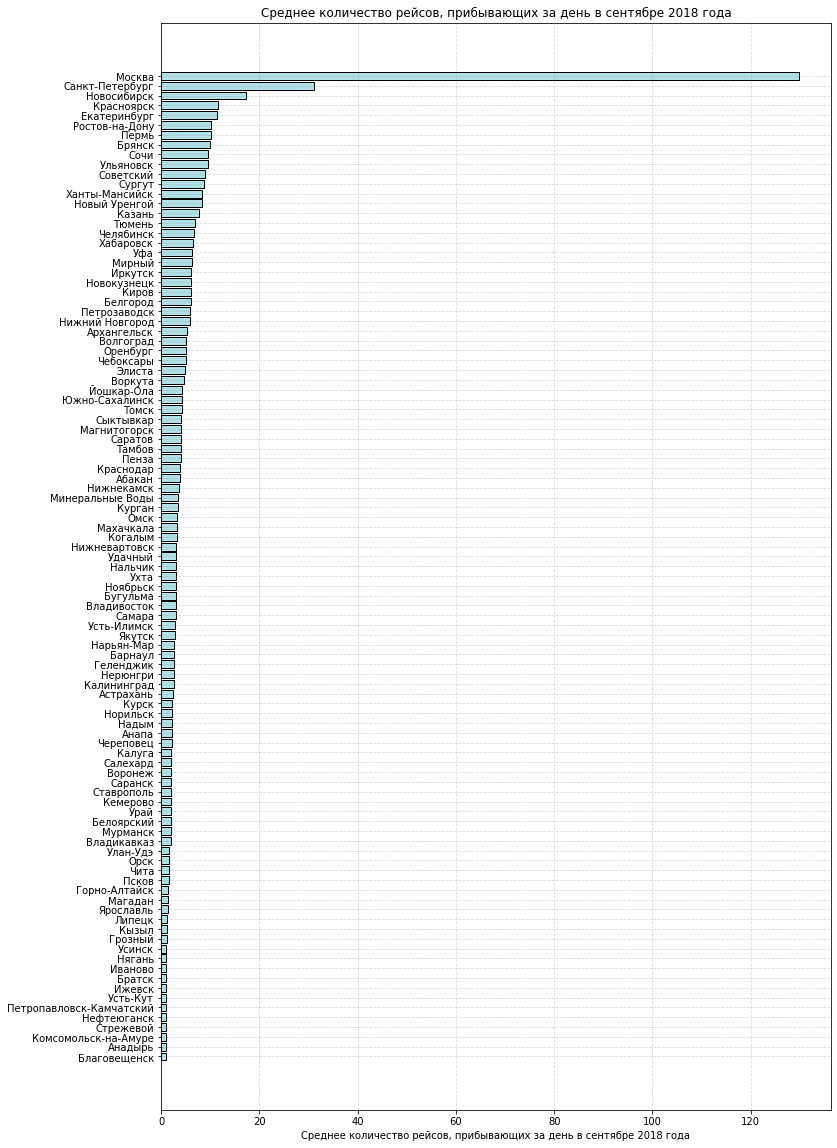

In [10]:
city_flights = city_flights.sort_values(by='average_flights', ascending = True)
plt.figure(figsize=(12, 20))
plt.barh(city_flights['city'], city_flights['average_flights'], 
         ec='black', alpha = 1, color='powderblue')
plt.grid(True, linestyle='--', 
                   color='grey', alpha=.3)
plt.title('Среднее количество рейсов, прибывающих за день в сентябре 2018 года')
plt.xlabel('Среднее количество рейсов, прибывающих за день в сентябре 2018 года')
plt.show()

<font color='blue'>Ок, хотя возможно вертикальное расположение стобиков было оптимальнее, не пришлось бы проматывать чтоб посмотреть весь график. </font>

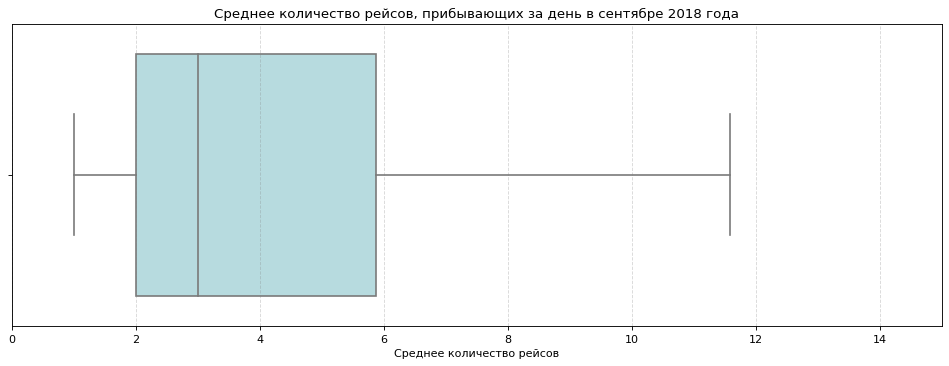

In [11]:
plt.figure(figsize=(15, 5), dpi= 80)
plt.xlim(0,15)
plt.title('Среднее количество рейсов, прибывающих за день в сентябре 2018 года')

plt.grid(linestyle='--', which='major',
         color='grey', alpha=.3)
sns.boxplot(y=city_flights['average_flights'], orient="h", color="powderblue")
plt.xlabel('Среднее количество рейсов')
plt.show()

 <a name="6"> Можем видеть на графиках, что:   </a>
 - наибольшее число рейсов в сентябре 2018 года совершено на самолетах модели Cessna 208 Caravan, также в топ-3 моделей вошли Bombardier CRJ-200 и Sukhoi SuperJet-100	
 - Москва выделяется намного большим средним числом принимаемых в день рейсов 
 - половина рассматриваемых городов принимает от 1 до 3 рейсов в день, медианное значение - 3 рейса в день. Размах составляет 11 рейсов, и, разумеется, топ-3 города с их средними попали в выбросы - это Москва, Санкт-Петербург и Новосибирск. 
 
Рассмотрим топ-10 подробнее.

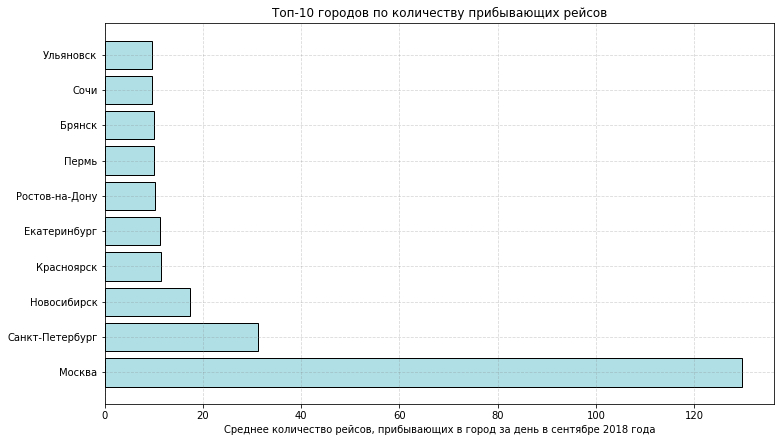

In [12]:
plt.figure(figsize=(12, 7))
plt.barh(top10['city'], top10['average_flights'], 
         ec='black', alpha = 1, color='powderblue')
plt.grid(True, linestyle='--', 
                   color='grey', alpha=.3)
plt.title('Топ-10 городов по количеству прибывающих рейсов')
plt.xlabel('Среднее количество рейсов, прибывающих в город за день в сентябре 2018 года')
plt.show()

Москва - главный транспортный узел страны. Московский авиационный узел (система аэропортов Москвы и МО) является третьим по загруженности авиационным хабом в Европе (после Лондонского и Парижского) и входит в десятку самых загруженных в мире. Логично, что число пребывающих в Москву рейсов на порядок превосходит число рейсов, пребывающих в другие города из российского топ-10.

<font color='blue'> Ок. Да, когда элементов на гшрафике не слишком много, горизонтальные столбики наглядны. </font>

### Проверка гипотезы средствами Python

В `/datasets/query_last.csv` содержится следующая информация:
   - **week_number** — номер недели;
   - **ticket_amount** — количество проданных билетов за неделю;
   - **festival_week** — есть ли на этой неделе фестиваль;
   - **festival_name** — название фестиваля.

Проверим гипотезу: **Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время**.

Импортируем файл: 

In [13]:
tickets = pd.read_csv('/datasets/query_last.csv')
tickets

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


Найдем среднее количество купленных за неделю билетов за фестивальный период, и за период без фестивалей.

In [14]:
festtime_mean = tickets[~tickets['festival_name'].isnull()]['ticket_amount'].mean()
nonfesttime_mean = tickets[tickets['festival_name'].isnull()]['ticket_amount'].mean()
print('Среднее количество купленных за неделю билетов за фестивальный период: ', 
      "{0:.0f}".format(festtime_mean))
print('Среднее количество купленных за неделю билетов за период без фестивалей: ', 
      "{0:.0f}".format(nonfesttime_mean))

Среднее количество купленных за неделю билетов за фестивальный период:  48663
Среднее количество купленных за неделю билетов за период без фестивалей:  51531


Проверим гипотезу о равенстве среднего спроса на билеты в обычное время и во время фестивалей (примем ее за **нулевую гипотезу**).

**Альтернативная гипотеза**: средний спрос на билеты в обычное время и во время фестивалей не одинаков.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод `scipy.stats.ttest_ind`. Пороговое значение `alpha` примем за `0.5`.

In [15]:
festtime = tickets[~tickets['festival_name'].isnull()]['ticket_amount']
nonfesttime = tickets[tickets['festival_name'].isnull()]['ticket_amount']
alpha = .05
results = stats.ttest_ind(
    festtime,
    nonfesttime)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):   
    print("Отвергаем нулевую гипотезу:")
    print("средние отличаются статистически значимо")
else:
    print("Не получилось отвергнуть нулевую гипотезу:")
    print("средний спрос на билеты в обычное время и во время фестивалей отличается статистически незначимо")

p-значение: 0.09688869045922928
Не получилось отвергнуть нулевую гипотезу:
средний спрос на билеты в обычное время и во время фестивалей отличается статистически незначимо


Выяснили, что спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время.

<font color='blue'> Гипотеза сформулирована и проверена верно. </font>

### Обогащение данных средствами Python

Парсером выгрузим информацию о населении городов России из Википедии и запишем ее в таблицу stat.

In [18]:
URL = 'https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%BE%D0%B2_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8_%D1%81_%D0%BD%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%D0%BC_%D0%B1%D0%BE%D0%BB%D0%B5%D0%B5_100_%D1%82%D1%8B%D1%81%D1%8F%D1%87_%D0%B6%D0%B8%D1%82%D0%B5%D0%BB%D0%B5%D0%B9'

In [19]:
req = requests.get(URL)
soup=BeautifulSoup(req.text, 'lxml')
table = soup.find("table",attrs={"class": "wikitable sortable"})

In [20]:
content=[] 
for row in table.find_all('tr'): 
    if not row.find_all('th'): 
            content.append([element.text for element in row.find_all('td')])
import pandas as pd
stat = pd.DataFrame(content) 
stat

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1\n,2,Москва[16],1039,2080,4609,6133,7194,8057,8878,...,11541,11613,11980,12108,12198,12330,12381,12506,12615,12692[17]\n
1,2\n,1,Санкт-Петербург,1265,1737,3431,3390,4033,4569,4989,...,4899,4953,5028,5132,5192,5226,5282,5352,5384,5393[17]\n
2,3\n,,Новосибирск,8,120,404,885,1161,1309,1420,...,1475,1499,1524,1548,1567,1584,1603,1613,1618,\n
3,4\n,35,Екатеринбург,43,140,423,779,1025,1210,1296,...,1353,1378,1396,1412,1428,1444,1456,1469,1483,1494[18]\n
4,5\n,8,Нижний Новгород,90,222,644,941,1170,1342,1400,...,1252,1255,1260,1264,1268,1267,1262,1259,1254,\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,167\n,136,Ногинск,11,39,81,95,104,119,123,...,100,102,102,102,102,102,102,103,102,\n
167,168\n,30,Елец,47,43,51,78,101,111,120,...,108,108,107,106,106,105,105,104,103,102[27]\n
168,169\n,61,Сергиев Посад,25,21,45,74,92,108,115,...,111,110,108,107,106,105,105,103,102,\n
169,170\n,,Новокуйбышевск,—,—,—,63,104,111,113,...,108,108,107,106,105,104,103,102,101,\n


Оставим только самую актуальную и полную информацию - за 2019 год. Приведем столбец с численностью к числовому типу. Исправим некорректное значение ячейки city для города Москва.

In [21]:
population = stat.loc[:,[2,20]]
population.columns = ['city','population']
population['population'] = pd.to_numeric(population['population'])
population.replace({'Москва[16]': 'Москва'}, inplace=True)
population

,city,population
0,Москва,12615
1,Санкт-Петербург,5384
2,Новосибирск,1618
3,Екатеринбург,1483
4,Нижний Новгород,1254
...,...,...
166,Ногинск,102
167,Елец,103
168,Сергиев Посад,102
169,Новокуйбышевск,101


Сократим таблицу из 171 городов, оставив данные о численности только в тех городах, где принимаются рейсы компании «F9»:

In [22]:
def table_cut(row):
    if row['city'] in city_flights['city'].unique():
        return True
    else:
        return False
    
population['isin'] = population.apply(table_cut, axis=1)
population = population[population['isin']].loc[:,['city','population']].copy()
population.reset_index(drop=True, inplace=True)
population

,city,population
0,Москва,12615
1,Санкт-Петербург,5384
2,Новосибирск,1618
3,Екатеринбург,1483
4,Нижний Новгород,1254
...,...,...
70,Нефтеюганск,128
71,Кызыл,118
72,Новый Уренгой,117
73,Ноябрьск,106


Добавим информацию о численности в таблицу city_flights. Оставим в таблице city_flights только те города, для которых известна численность:

In [23]:
city_flights = city_flights.merge(population, on='city', how='left')
city_flights = city_flights[~city_flights['population'].isna()].copy()

Добавим в таблицу метрику - число полетов на тысячу человек, отсортируем по этому столбцу и выведем топ-30:

In [73]:
city_flights['per_1000'] = city_flights['average_flights'] / city_flights['population']
city_flights.sort_values(by='per_1000', ascending=False).head(20)

,city,average_flights,population,per_1000
87,Новый Уренгой,8.290323,117.0,0.070857
70,Элиста,4.870968,103.0,0.047291
48,Ноябрьск,3.000000,106.0,0.028302
93,Брянск,10.000000,405.0,0.024691
89,Сургут,8.741935,374.0,0.023374
92,Сочи,9.612903,439.0,0.021897
67,Южно-Сахалинск,4.290323,201.0,0.021345
76,Петрозаводск,5.870968,280.0,0.020968
59,Абакан,3.870968,186.0,0.020812
65,Сыктывкар,4.129032,245.0,0.016853


Интересно, что в рейтинге по наибольшему числу рейсов на каждую тысячу населения вообще нет городов-миллионников в первых топ-20. Среди городов, попавших в топ-20 - столицы республик, курорты, промышленные центры. 

Посмотрим, как коррелирует среднее число принимаемых рейсов и численность города:

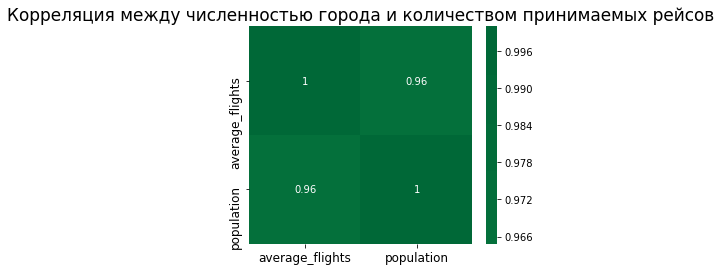

In [72]:
columns = ['average_flights', 'population']
plt.figure(figsize=(5,4))
sns.heatmap(city_flights[columns].corr(), 
            xticklabels=city_flights[columns].corr().columns, 
            yticklabels=city_flights[columns].corr().columns, 
            cmap='RdYlGn', center=0, annot=True)

plt.title('Корреляция между численностью города и количеством принимаемых рейсов', fontsize=17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Корреляция сильная, как и ожидалось. 

### Вывод

-  самые популярные в сентябре 2018 года  модели самолета: Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100
-  Москва - самый загруженный транспортный узел страны
-  в среднем в городах России принимается по 3 рейса в день
-  загруженность городских аэропортов ожидаемо коррелирует с численностью их населения
-  спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время

<font color='blue'> Ок, отлично, очень подробный анализ. Так держать, удачи в следующих проектах. </font>